Распределение классов: Counter({0: 142157, 1: 246})
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.44      0.73      0.55       246

    accuracy                           1.00    142404
   macro avg       0.72      0.87      0.77    142404
weighted avg       1.00      1.00      1.00    142404



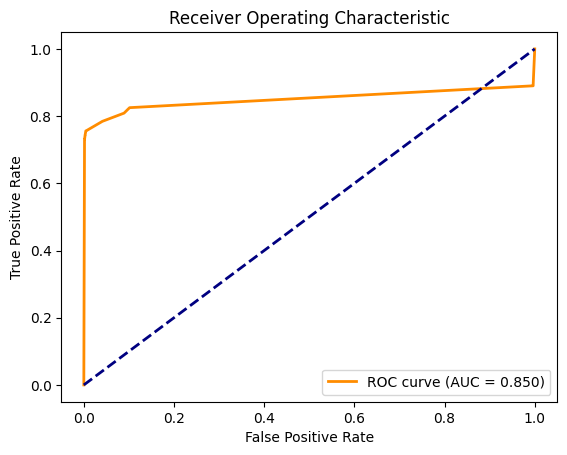

ROC AUC score: 0.850


In [9]:
import ml_module as ml
import gradboost as gb
import Light_Boost as lg
import decisiontree as dt
import xboost as xg
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc



file_path = 'creditcard.csv'

df = ml.load_data(file_path)

#т.к. относительно объема датасета (100к строк) кол-во пропусков небольшое (до 20шт),
# то можно строки с пропусками удалить (см.препроцессинг). Т.к. классы очень сильно
# несбалансированы применим fit_resample() увеличивающий 1-ый класс с помощью KNN
target = 'Class'
X_train, X_test, y_train, y_test = ml.boost_preprocessing(df, target)
# X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)

from collections import Counter
print("Распределение классов:", Counter(y_train))
# градиентный бустинг
clf = gb.GBoost(X_train, X_test, y_train, y_test, target)
gb.evaluate(clf, X_test, y_test)

y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
          label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Можно также напрямую вычислить AUC
print(f"ROC AUC score: {roc_auc_score(y_test, y_proba):.3f}")

[LightGBM] [Info] Number of positive: 197, number of negative: 113725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 113922, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 197, number of negative: 113725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 113922, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[L

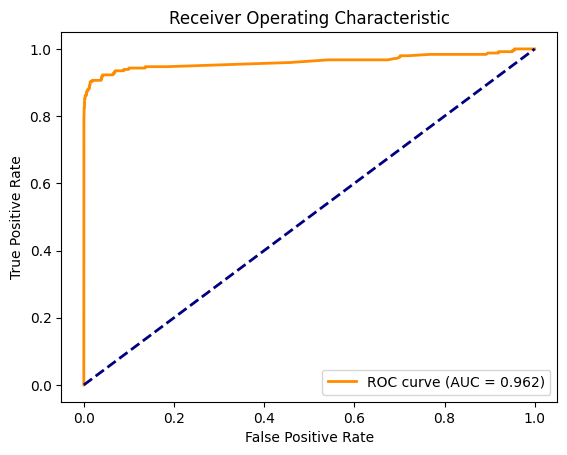

ROC AUC score: 0.962


In [18]:
#легкий градиентный бустинг
best_clf = lg.LGBoost(X_train, X_test, y_train, y_test)
lg.evaluate(best_clf, X_test, y_test)

# roc-auc plot
y_proba = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
          label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Можно также напрямую вычислить AUC
print(f"ROC AUC score: {roc_auc_score(y_test, y_proba):.3f}")



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils

Accuracy на тестовых данных: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.93      0.63      0.75       246

    accuracy                           1.00    142404
   macro avg       0.96      0.81      0.88    142404
weighted avg       1.00      1.00      1.00    142404



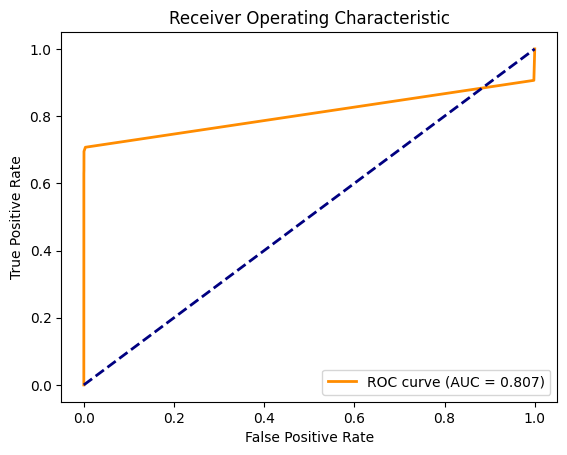

ROC AUC score: 0.807


In [17]:
#решающее дерево
best_clf = dt.dt_classify(X_train, y_train)
dt.evaluate(X_test, y_test, best_clf)

# roc-auc plot
y_proba = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
          label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Можно также напрямую вычислить AUC
print(f"ROC AUC score: {roc_auc_score(y_test, y_proba):.3f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:33:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "binary", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:33:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "binary", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:33:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "binary", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:33:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "binary", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 9}
Лучшая точность (CV): 0.9995646163576822
Accuracy на тестовых данных: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.96      0.74      0.84       246

    accuracy                           1.00    142404
   macro avg       0.98      0.87      0.92    142404
weighted avg       1.00      1.00      1.00    142404



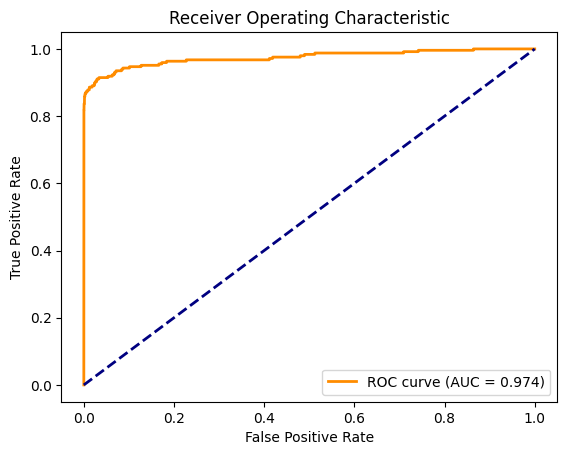

ROC AUC score: 0.974


In [16]:

#экстра бустинг
best_clf = xg.XBoost_classify(X_train, y_train)
xg.evaluate(X_test, y_test, best_clf)

# roc-auc plot
y_proba = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
          label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Можно также напрямую вычислить AUC
print(f"ROC AUC score: {roc_auc_score(y_test, y_proba):.3f}")

[LightGBM] [Info] Number of positive: 246, number of negative: 142157
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 142403, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001727 -> initscore=-6.359356
[LightGBM] [Info] Start training from score -6.359356
[LightGBM] [Info] Number of positive: 197, number of negative: 113725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 113922, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358335
[LightGBM] [Info] Start training from score -6.358335
[LightGBM] [

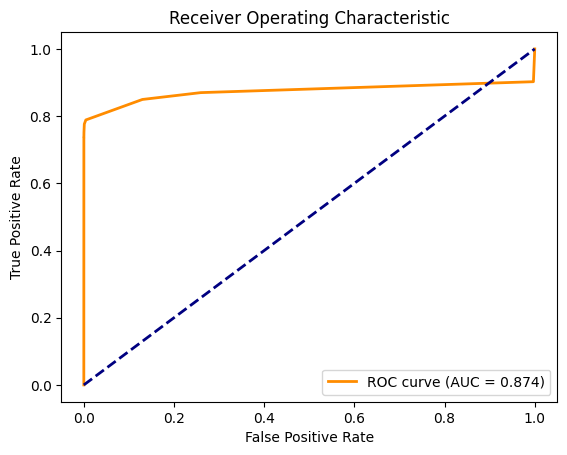

ROC AUC score: 0.874


In [15]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


base_classifiers = [
    ('xgb', xgb.XGBClassifier(eval_metric='logloss', booster='gbtree', max_depth=9, learning_rate=0.1)),
    ('lgb', lgb.LGBMClassifier(learning_rate=0.02))]

meta_classifier = DecisionTreeClassifier(max_depth=7, max_features='sqrt')

stack_model = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Обучение модели
stack_model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = stack_model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)

# roc-auc plot
y_proba = stack_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
          label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Можно также напрямую вычислить AUC
print(f"ROC AUC score: {roc_auc_score(y_test, y_proba):.3f}")